In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_4604/1059327005.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2010-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
2023-11-16,49.450851,49.495827,48.301531,48.650325,339756000,44.654481,3.243790,51.142061,38.166901,NaN,NaN,NaN
2023-11-17,49.268967,49.687719,48.978138,49.494831,325205000,45.049798,3.302733,51.655265,38.444332,0.0,-0.003678,0.000000
2023-11-20,50.379311,50.518229,49.152033,49.282957,414120000,45.421280,3.467793,52.356865,38.485694,0.0,0.018775,0.000000
2023-11-21,49.914585,50.487246,49.193010,50.096477,565747000,45.735145,3.580084,52.895314,38.574976,0.0,0.009378,0.000000
2023-11-22,48.687302,50.305347,47.661905,49.822634,899420000,46.081790,3.509301,53.100392,39.063189,0.0,-0.015441,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-13,188.320007,190.110001,185.960007,187.970001,153482800,182.444501,5.947290,194.339081,170.549921,0.0,2.808226,0.156338
2025-10-14,180.029999,184.800003,179.699997,184.770004,205641400,182.702000,5.709258,194.120517,171.283483,0.0,2.640584,0.156338
2025-10-15,179.830002,184.869995,177.289993,184.800003,214450500,183.179001,4.968092,193.115185,173.242816,0.0,2.636540,0.156338


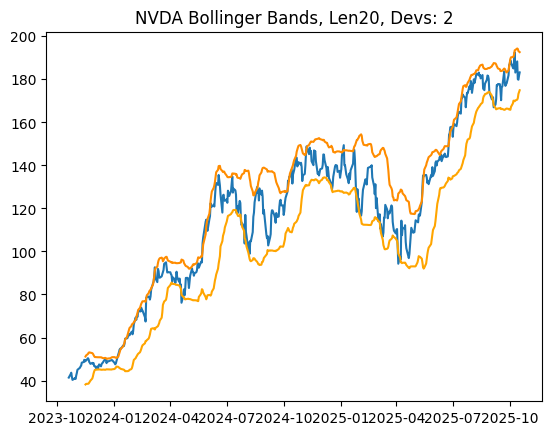

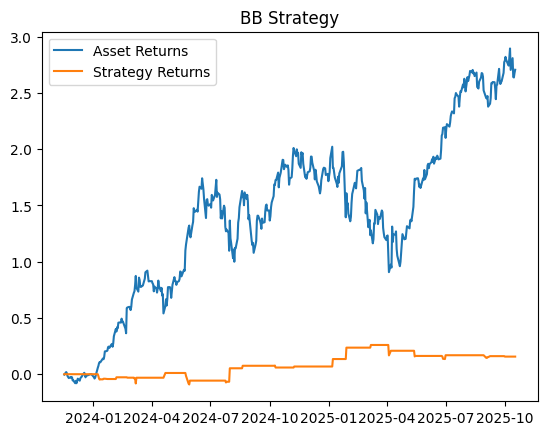

In [25]:
TICKER = 'NVDA'
BB_LEN = 20
STD_DEV = 2
LOOKBACK = 500

def get_data(ticker=TICKER):
    df=yf.download(ticker,start='2010-01-01')
    df.columns = df.columns.get_level_values(0)
    
    #only return the usbset of data interested in
    return df.iloc[-LOOKBACK:,:]
 
def add_bollinger_bands(df, devs=STD_DEV, bb_len = BB_LEN):
    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()
    
    #get the std dev of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()
    
    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])
    df.dropna()
    
    plt.plot(df['Close'])
    plt.plot(df['Upper_Band'], color='darkorange')
    plt.plot(df['Lower_Band'], color = 'orange')

    plt.title(f'{TICKER} Bollinger Bands, Len{BB_LEN}, Devs: {STD_DEV}')
    
    return df.dropna()

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['Close']> df['Upper_Band'], -1, 
                        np.where(df['Close']< df['Lower_Band'], 1,0)
                        )
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.title('BB Strategy')
    plt.legend(['Asset Returns', 'Strategy Returns'])
    return df

def main():
    df = get_data(TICKER)
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)
    return df

df = main()
df

Text(0.5, 1.0, 'NVDA Bollinger Bands, Len20, Devs: 2')

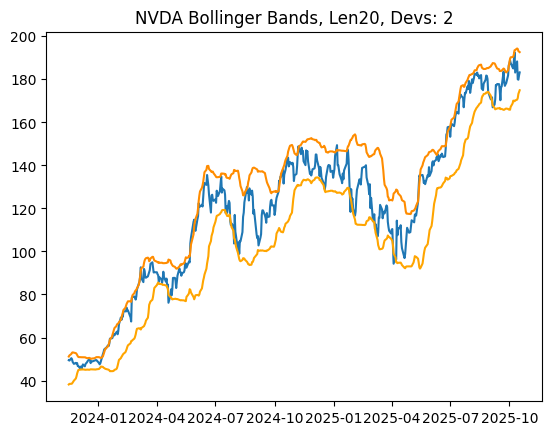

In [20]:
plt.plot(df['Close'])
plt.plot(df['Upper_Band'], color='darkorange')
plt.plot(df['Lower_Band'], color = 'orange')

plt.title(f'{TICKER} Bollinger Bands, Len{BB_LEN}, Devs: {STD_DEV}')